In [1]:
%load_ext watermark
%watermark -d -u -a 'Kiet_Dinh' -v -p pandas,numpy,mlxtend,matplotlib,sklearn,itertools

Kiet_Dinh 
last updated: 2020-06-29 

CPython 3.7.7
IPython 7.13.0

pandas 1.0.3
numpy 1.18.1
mlxtend 0.17.2
matplotlib 3.1.3
sklearn 0.22.1
itertools unknown


In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1.1

### 1.1.1

In [3]:
import pandas as pd
df = pd.read_csv('wdbc.data', header=None)
# convert class label "M"->1 and label "B"->0
df[1] = df[1].apply(lambda x: 1 if x == 'M' else 0)
df.head()

0   1      2      3       4       5        6        7       8   \
0    842302   1  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517   1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903   1  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301   1  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402   1  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  

[5 rows x 32 columns]

In [4]:
from sklearn.model_selection import train_test_split
y = df[1].values
X = df.loc[:, 2:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0,stratify=y)

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

# param_grid = [{ # YOUR CODE HERE }]
param_grid = [{"kneighborsclassifier__n_neighbors" : list(range(1,17))}]
    
gs = GridSearchCV(pipe,param_grid=param_grid ,iid=False,n_jobs=-1,refit=True,scoring='accuracy',cv=10)
gs.fit(X_train, y_train)
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))

Best Accuracy: 97.24%


In [6]:
# MODIFY THIS CELL
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Best Params: %s' % gs.best_params_)

# This may be gs.cv_results_["mean_test_score"]
print('Test Accuracy: %.2f%%' % (accuracy_score(y_pred, y_test)*100))

Best Params: {'kneighborsclassifier__n_neighbors': 5}
Test Accuracy: 93.57%


### 1.1.2 

In [7]:
from mlxtend.evaluate import bootstrap_point632_score
import numpy as np
scores = bootstrap_point632_score( gs, X_test, y_test, random_seed=1, method='.632+')
acc = np.mean(scores)
print('Accuracy: %.2f%%' % (100*acc))

Accuracy: 95.67%


In [8]:
len(scores)

200

In [9]:
# MODIFY THIS CELL

lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)

print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

95% Confidence interval: [92.08, 98.88]


# 1.2

### 1.2.1

In [10]:
%matplotlib inline

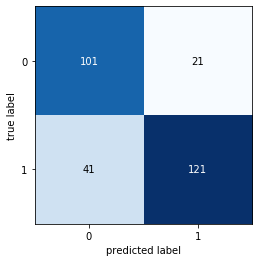

In [11]:
import numpy as np
from helper import plot_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

example_cm = np.array([[101, 21], [41, 121]])
plot_confusion_matrix(example_cm)
plt.show()

In [12]:
y_true = np.array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])
y_predicted = np.array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

def confusion_matrix_binary(y_true, y_predicted):
    
    tp, fn, fp, tn = 0, 0, 0, 0
    
    for i, j in zip(y_true, y_predicted):
        if i == j:
            if i == 0:
                tp += 1
            else:
                tn += 1
        else:
            if i == 0:
                fn += 1
            else:
                fp += 1
                
    conf_matrix = np.zeros(4).reshape(2, 2).astype(int)
    conf_matrix[0, 0] = tp
    conf_matrix[0, 1] = fn
    conf_matrix[1, 0] = fp
    conf_matrix[1, 1] = tn
    
    return conf_matrix

result_matrix = confusion_matrix_binary(y_true, y_predicted)


In [13]:
print('Conusion matrix array:\n', result_matrix)

Conusion matrix array:
 [[7 0]
 [4 9]]


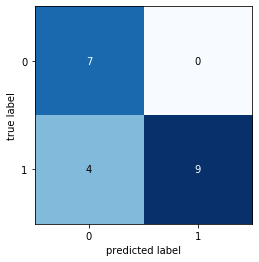

In [14]:
plot_confusion_matrix(result_matrix)
plt.show()

### 1.2.2

In [15]:
import numpy as np
from itertools import product

def confusion_matrix_multiclass(y_true, y_predicted):
    
    # combine prediction and target to list all possible unique labels/ classes
    class_labels = np.unique(np.concatenate((y_true, y_predicted)))

    
    if class_labels.shape[0] == 1:
        if class_labels[0] != 0:
            class_labels = np.array([0, class_labels[0]])
        else:
            class_labels = np.array([class_labels[0], 1])
            
            
    n_labels = class_labels.shape[0]
    lst = []
    z = list(zip(y_true, y_predicted))
    
    # product from itertools return all combination of n numbers of elements in class_labels
    for combi in product(class_labels, repeat=2):
        lst.append(z.count(combi))
        
    # convert to 1d array
    mat_1d = np.asarray(lst)[:, None]
    
    # reshape the array to number of unique labels (5,5)
    mat = mat_1d.reshape(n_labels, n_labels)
    return mat

y_true = [1, 1, 1, 1, 0, 2, 0, 3, 4, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0]
y_predicted = [1, 0, 1, 1, 0, 2, 1, 3, 4, 2, 2, 0, 2, 1, 2, 1, 0, 3, 1, 1]
result_matrix = confusion_matrix_multiclass(y_true, y_predicted)
result_matrix

array([[2, 2, 0, 0, 0],
       [1, 6, 1, 1, 0],
       [1, 0, 4, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [16]:
type(result_matrix)

numpy.ndarray

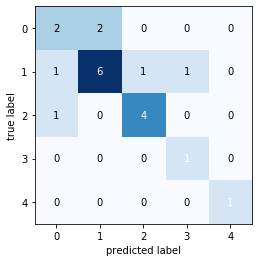

In [17]:
plot_confusion_matrix(result_matrix)
plt.show()

### 1.2.3

In [18]:
def binary_cm_from_multiclass(y_true, y_predicted, positive_label):
    y_true_ary = np.array(y_true)
    y_predicted_ary = np.array(y_predicted)
    
    y_true_mod = np.where(y_true_ary != positive_label, 0, 1)
    y_predicted_mod = np.where(y_predicted_ary != positive_label, 0, 1)
    
    cm = confusion_matrix_multiclass(y_true_mod, y_predicted_mod)
    return cm

Positive Label 0:
 [[14  2]
 [ 2  2]]


[Text(0, 0, ''), Text(0, 0, 'Pos Class (0)'), Text(0, 0, 'Neg Class (Rest)')]

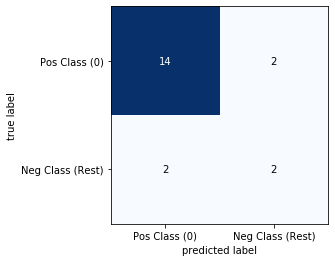

In [20]:
y_true =[1, 1, 1, 1, 0, 2, 0, 3, 4, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0]
y_predicted = [1, 0, 1, 1, 0, 2, 1, 3, 4, 2, 2, 0, 2, 1, 2, 1, 0, 3, 1, 1]
mat_pos0 = binary_cm_from_multiclass(y_true, y_predicted, positive_label=0)
print('Positive Label 0:\n', mat_pos0)
fig, ax = plot_confusion_matrix(mat_pos0)
ax.set_xticklabels(['', 'Pos Class (0)', 'Neg Class (Rest)'])
ax.set_yticklabels(['', 'Pos Class (0)', 'Neg Class (Rest)'])



Positive Label 1:
 [[9 2]
 [3 6]]


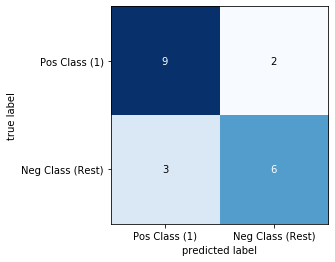

In [21]:
mat_pos1 = binary_cm_from_multiclass(y_true, y_predicted, positive_label=1)
print('\n\nPositive Label 1:\n', mat_pos1)
fig, ax = plot_confusion_matrix(mat_pos1)
ax.set_xticklabels(['', 'Pos Class (1)', 'Neg Class (Rest)'])
ax.set_yticklabels(['', 'Pos Class (1)', 'Neg Class (Rest)']);
plt.show()

# 1.3

In [22]:
# MODIFY THIS CELL
import numpy as np
def balanced_accuracy(y_true, y_predicted):
    y_true_ary = np.array(y_true)
    y_predicted_ary = np.array(y_predicted)
    unique_labels = np.unique(np.concatenate((y_true_ary, y_predicted_ary)))
    class_accuracies = []
    for l in unique_labels:
        acc = (np.where(y_true_ary != l, 1, 0) == np.where(y_predicted_ary != l, 1, 0)).mean()
        print(np.where(y_true_ary != l, 1, 0))
        print(np.where(y_predicted_ary != l, 1, 0))
        print(np.where(y_true_ary != l, 1, 0) == np.where(y_predicted_ary != l, 1, 0))
        class_accuracies.append(acc)
    return np.mean(class_accuracies)



In [23]:
# EXECUTE BUT DO NOT MODIFY THIS CELL
y_targ = [1, 1, 2, 1, 1, 2, 0, 3]
y_pred = [0, 0, 2, 1, 1, 2, 1, 3]
balanced_accuracy(y_targ, y_pred)

[1 1 1 1 1 1 0 1]
[0 0 1 1 1 1 1 1]
[False False  True  True  True  True False  True]
[0 0 1 0 0 1 1 1]
[1 1 1 0 0 1 0 1]
[False False  True  True  True  True False  True]
[1 1 0 1 1 0 1 1]
[1 1 0 1 1 0 1 1]
[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 0]
[1 1 1 1 1 1 1 0]
[ True  True  True  True  True  True  True  True]


0.8125

# 1.4

### 1.4.1

In [24]:
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X, y = iris_data()
X, y = X[:100, [1]], y[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0,stratify=y)
model = LogisticRegression(solver='lbfgs', random_state=123)
model.fit(X_train, y_train)
y_probabilities = model.predict_proba(X_test)
print(y_probabilities)

[[0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.50487831 0.49512169]
 [0.74306586 0.25693414]
 [0.89133165 0.10866835]
 [0.74306586 0.25693414]
 [0.44001556 0.55998444]
 [0.74306586 0.25693414]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.74306586 0.25693414]
 [0.50487831 0.49512169]
 [0.56957726 0.43042274]
 [0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.50487831 0.49512169]
 [0.05482486 0.94517514]
 [0.82965589 0.17034411]
 [0.86339788 0.13660212]
 [0.17593095 0.82406905]
 [0.50487831 0.49512169]
 [0.3771385  0.6228615 ]
 [0.31814182 0.68185818]
 [0.74306586 0.25693414]
 [0.50487831 0.49512169]
 [0.17593095 0.82406905]
 [0.44001556 0.55998444]
 [0.3771385  0.6228615 ]
 [0.6319844  0.3680156 ]
 [0.44001556 0.55998444]
 [0.3771385  0.6228615 ]


In [25]:
# MODIFY THIS CELL
import matplotlib.pyplot as plt
import numpy as np
def plot_roc_curve(y_true, y_score, pos_label=1, num_thresholds=100):
    y_true_ary = np.array(y_true)
    y_score_ary = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)    
    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - num_positives
    
    for i, thr in enumerate(thresholds):
        binarized_scores = np.where(y_score >= thr, pos_label, int(not pos_label))
        positive_predictions = (binarized_scores == pos_label)
        num_true_positives = (y_true[positive_predictions] == pos_label).sum()
        num_false_positives = (y_true[positive_predictions] != pos_label).sum()
        
        x_axis_values.append(num_false_positives / float(num_negatives))
        y_axis_values.append(num_true_positives / float(num_positives))
    plt.step(x_axis_values, y_axis_values, where='post')
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return None

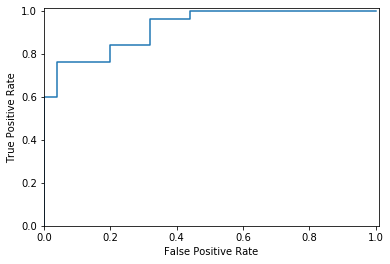

In [26]:
plot_roc_curve(y_test, y_probabilities[:, 1], pos_label=1)
plt.show()

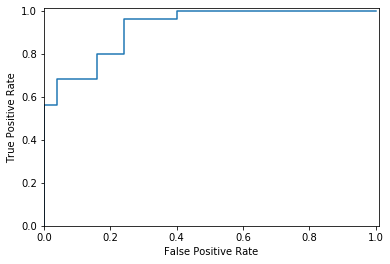

In [27]:
# EXECUTE BUT DO NOT MODIFY THIS CELL
plot_roc_curve(y_test, y_probabilities[:, 0], pos_label=0)
plt.show()

### 1.4.2

In [28]:
def plot_roc_curve_plus_auc(y_true, y_score, pos_label=1, num_thresholds=100):
    y_true_ary = np.array(y_true)
    y_score_ary = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)    
    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - num_positives
    
    for i, thr in enumerate(thresholds):
        binarized_scores = np.where(y_score >= thr, pos_label, int(not pos_label))
        positive_predictions = (binarized_scores == pos_label)
        num_true_positives = (y_true[positive_predictions] == pos_label).sum()
        num_false_positives = (y_true[positive_predictions] != pos_label).sum()
        
        x_axis_values.append(num_false_positives / float(num_negatives))
        y_axis_values.append(num_true_positives / float(num_positives))
        
    plt.step(x_axis_values, y_axis_values, where='post')
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    
    direction = 1
    dx = np.diff(x_axis_values)
    if np.any(dx < 0):
        if np.all(dx <= 0):
            direction = -1
    roc_auc = direction*np.trapz(y_axis_values, x_axis_values)
    return roc_auc

In [29]:
# Test the roc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probabilities[:, 0])

0.10319999999999999

ROC AUC: 0.8968


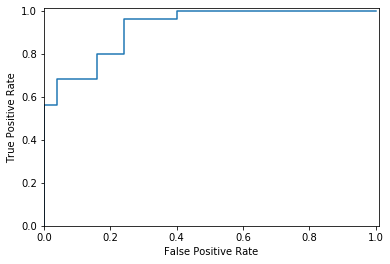

In [30]:
auc = plot_roc_curve_plus_auc(y_test, y_probabilities[:, 0], pos_label=0)
print('ROC AUC: %.4f' % auc)

# 1.5

### 1.5.1

ROC AUC: 0.8968


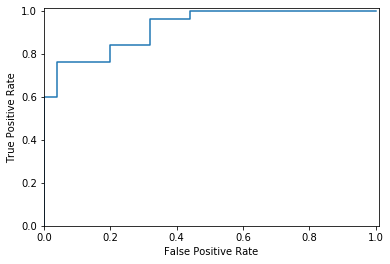

In [31]:
auc = plot_roc_curve_plus_auc(y_test, y_probabilities[:, 1], pos_label=1)
print('ROC AUC: %.4f' % auc)

In [32]:
import pandas as pd
df_wine = pd.read_csv('wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [33]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [34]:
import numpy as np
from sklearn.model_selection import cross_val_score

def feature_importance_dropcolumn(estimator, X, y, cv=5):
    
    base_accuracy = np.mean(cross_val_score(estimator, X,y,cv=5 ))
    column_indices = np.arange(X.shape[1]).astype(int)
    drop_accuracies = np.zeros(column_indices.shape[0])

    for idx in column_indices:
        mask = np.ones(column_indices.shape[0]).astype(bool)
        mask[idx] = False
        drop_accuracy = np.mean(cross_val_score(estimator, X[:,list(mask)], y ,cv=5))        
        drop_accuracies[idx] = base_accuracy - drop_accuracy

        
    return drop_accuracies

In [35]:
# MODIFY THIS CELL
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe = make_pipeline( StandardScaler(), KNeighborsClassifier(n_neighbors = 5))
feature_importance_dropcolumn(pipe, X_train, y_train)

array([ 8.66666667e-03, -8.00000000e-03,  8.00000000e-03,  8.00000000e-03,
        8.33333333e-03,  8.00000000e-03,  1.60000000e-02, -8.00000000e-03,
       -8.00000000e-03,  0.00000000e+00,  0.00000000e+00, -2.22044605e-16,
        2.43333333e-02])

### 1.5.2

##### estimators 200, random seed 0

In [36]:
from sklearn.ensemble import RandomForestClassifier
drop_importances = feature_importance_dropcolumn(RandomForestClassifier(n_estimators=100,random_state= 0), X=X_train, y=y_train, cv=5)
print('Drop Importance from RF:', drop_importances)

Drop Importance from RF: [ 0.02433333  0.          0.008       0.          0.008       0.008
  0.          0.008       0.          0.008       0.          0.
 -0.008     ]


In [37]:
drop_importances2 = np.argsort(drop_importances)[::-1]

drop_importances2

array([ 0,  9,  7,  5,  4,  2, 11, 10,  8,  6,  3,  1, 12], dtype=int64)

In [38]:
print("3 MOST IMPORTANT FEATURES")
print("Indices:", drop_importances2[0:3])
print("Columns:", list(df_wine.columns[1:][drop_importances2[0:3]]))

3 MOST IMPORTANT FEATURES
Indices: [0 9 7]
Columns: ['Alcohol', 'Color intensity', 'Nonflavanoid phenols']


##### estimators 100, random state 0

In [39]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print('Random Forest Feature Importance:\n', feature_importance_dropcolumn(forest, X=X_test, y=y_test, cv=5))

Random Forest Feature Importance:
 [0.03636364 0.03636364 0.01818182 0.01818182 0.03636364 0.03636364
 0.03636364 0.01818182 0.01818182 0.01818182 0.01818182 0.
 0.03636364]


In [40]:
direct_feature_importance = np.argsort(forest.feature_importances_)[::-1]

direct_feature_importance

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  7,  2,  3], dtype=int64)

In [41]:
print("3 MOST IMPORTANT FEATURES")
print("Indices:", direct_feature_importance[0:3])
print("Columns:", list(df_wine.columns[1:][direct_feature_importance[0:3]]))

3 MOST IMPORTANT FEATURES
Indices: [12  6  9]
Columns: ['Proline', 'Flavanoids', 'Color intensity']


##### random seed 0, permutation rounds 50

In [42]:
from mlxtend.evaluate import feature_importance_permutation
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
mean_importance_vals, all_importance_vals = feature_importance_permutation(X_test, y_test,forest.predict,  'accuracy', 50, 0)

In [43]:
print('Random Forest Feature Importance Permutation:\n',mean_importance_vals )

Random Forest Feature Importance Permutation:
 [0.02740741 0.         0.         0.         0.         0.
 0.04296296 0.         0.         0.10296296 0.00666667 0.02074074
 0.08185185]


In [44]:
fip = np.argsort(mean_importance_vals)[::-1]

fip

array([ 9, 12,  6,  0, 11, 10,  8,  7,  5,  4,  3,  2,  1], dtype=int64)

In [45]:
print("3 MOST IMPORTANT FEATURES")
print("Indices:", fip[0:3])
print("Columns:", list(df_wine.columns[1:][fip[0:3]]))

3 MOST IMPORTANT FEATURES
Indices: [ 9 12  6]
Columns: ['Color intensity', 'Proline', 'Flavanoids']


### 1.5.3

In [46]:
from sklearn.base import BaseEstimator
import numpy as np
class ColumnSelector(BaseEstimator):
    def __init__(self, cols=None):
        self.cols = cols
        
    def fit_transform(self, X, y=None):
        return self.transform(X=X, y=y)
    
    def transform(self, X, y=None):
        feature_subset = X[:, self.cols]
        if len(feature_subset.shape) == 1:
            feature_subset = feature_subset[:, np.newaxis]
        return feature_subset
    
    def fit(self, X, y=None):
        return self

In [61]:
# EXECUTE BUT DO NOT EDIT THIS CELL
import pandas as pd
df_wine = pd.read_csv('wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [62]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [63]:
# EXECUTE BUT DO NOT EDIT THIS CELL
col_sele = ColumnSelector(cols=[0, 5, 8, 11])
reduced_subset = col_sele.transform(X_train)
print('Original feature set size:', X_train.shape)
print('Selected feature set size:', reduced_subset.shape)

Original feature set size: (124, 13)
Selected feature set size: (124, 4)


In [64]:
# MODIFY THIS CELL
from sklearn.base import BaseEstimator
import numpy as np
class ImportanceSelector(BaseEstimator):
    
    def __init__(self, num_features, random_forest_estimator):
        self.num_features = num_features
        self.forest = random_forest_estimator
        
    def transform(self, X, y=None):
        
        # Feature by increasing feature importance:
        features_by_importance = np.argsort(self.forest.feature_importances_)[::-1]
        top_k_feature_indices = features_by_importance[0:self.num_features]
        
        feature_subset = X[:, top_k_feature_indices]
        
        if len(feature_subset.shape) == 1:
            feature_subset = feature_subset[:, np.newaxis]
        return feature_subset
    
    def fit(self, X, y=None):
        self.forest.fit(X, y)
        return self

In [65]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=123)

selector = ImportanceSelector(num_features=3, random_forest_estimator=forest)
selector.fit(X_train, y_train)
reduced_train_features = selector.transform(X_train, y_train)


print('Original feature set size:', X_train.shape)
print('Selected feature set size:', reduced_train_features.shape)
print('First 5 rows:\n', reduced_train_features[:5])

Original feature set size: (124, 13)
Selected feature set size: (124, 3)
First 5 rows:
 [[5.500e+02 8.000e-01 4.400e+00]
 [1.235e+03 2.740e+00 5.400e+00]
 [1.285e+03 3.250e+00 5.700e+00]
 [1.095e+03 2.530e+00 4.200e+00]
 [6.950e+02 6.600e-01 7.100e+00]]


# 1.6 Bonus

In [52]:
# EXECUTE BUT DO NOT EDIT
import pandas as pd
df_wine = pd.read_csv('wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [53]:
# EXECUTE BUT DO NOT EDIT
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, stratify=y,random_state=0)

In [54]:
# EXECUTE BUT DO NOT EDIT THIS CELL
from sklearn.base import BaseEstimator
import numpy as np
class ColumnSelector(BaseEstimator):
    def __init__(self, cols=None):
        self.cols = cols
    def fit_transform(self, X, y=None):
        return self.transform(X=X, y=y)
    def transform(self, X, y=None):
        feature_subset = X[:, self.cols]
        if len(feature_subset.shape) == 1:
            feature_subset = feature_subset[:, np.newaxis]
        return feature_subset
    def fit(self, X, y=None):
        return self

In [55]:
# MODIFY THIS CELL
import itertools

# after dropping label column, feature columns is from 0 -> 12 included
all_combin_2 = list(itertools.combinations(list(range(12)),2))
print('Number of all possible 2-feature combinations:', len(all_combin_2))

Number of all possible 2-feature combinations: 66


In [56]:
all_combin_2

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (8, 9),
 (8, 10),
 (8, 11),
 (9, 10),
 (9, 11),
 (10, 11)]

In [57]:
# Modify the following code cell to create a pipeline (as explained at the beginning of this section),
# and use the given param_grid to fit the GridSearchCV to obtain the best parameters settings and
# a classifier fit to X_train and y_train based on these best hyperparameter values.
# (Note that the code may take 10-30 seconds to execute.)


In [58]:
# MODIFY THIS CELL
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline( StandardScaler(), ColumnSelector(),KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors': list(range(1, 8)), 'columnselector__cols': all_combin_2}
gsearch = GridSearchCV(pipe, param_grid=param_grid, refit=True, iid=False, cv=5)
gsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('columnselector',
                                        ColumnSelector(cols=None)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors

In [59]:
# EXECUTE BUT DO NOT EDIT
print(gsearch.best_params_)

{'columnselector__cols': (6, 9), 'kneighborsclassifier__n_neighbors': 5}


In [60]:
# Based on the best combination of a 2-feature subset and the number of n_neigbors your model
# should be fit the the training dataset now. Use the fitted model and compute its classification
# accuracy on the test set (X_test, y_test).
from sklearn.metrics import accuracy_score
y_pred = gsearch.predict(X_test)
round(accuracy_score(y_pred, y_test),4)

0.9259